<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 30px; font-size: 27px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming For Data Science @ FIT-HCMUS, VNU-HCM
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Exploratory data analysis
</div>

## 1. Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Read cleaned data

In [2]:
df = pd.read_csv("../data/processed/supermarket_sales_processed.csv",index_col="Invoice ID")
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Datetime
Invoice ID,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,2019-01-05 13:08:00
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,2019-03-08 10:29:00
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,2019-03-03 13:23:00
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,2019-01-27 20:33:00
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2019-02-08 10:37:00


## 3. Question 1: How do the hourly variations in customers making product purchases and their respective ratings differ across different store locations?      

**Answering this question will**:  
- Enable businesses to optimize staffing, inventory management, and resource allocation effectively to match customer demand by understanding peak hours of purchases.
- Allow businesses to potentially increase customer satisfaction and loyalty by understanding the correlation between purchase times and ratings, thereby ensuring better service delivery during those periods.

**How we answer this question**: 
- Create `Hour` column.
- Filter DataFrame for each location.
- For each DataFrame, group by `Hour` and calculate number of transaction and mean rating.
- Visualize and comment on the chart.

### 3.1 Pre-processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           1000 non-null   object 
 1   Customer type  1000 non-null   object 
 2   Gender         1000 non-null   object 
 3   Product line   1000 non-null   object 
 4   Unit price     1000 non-null   float64
 5   Quantity       1000 non-null   int64  
 6   Tax 5%         1000 non-null   float64
 7   Total          1000 non-null   float64
 8   Payment        1000 non-null   object 
 9   cogs           1000 non-null   float64
 10  gross income   1000 non-null   float64
 11  Rating         1000 non-null   float64
 12  Datetime       1000 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 109.4+ KB


Convert `Datetime` column to type Datetime and create `Hour` column.

In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Hour'] = df["Datetime"].dt.hour
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Datetime,Hour
Invoice ID,,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,2019-01-05 13:08:00,13
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,2019-03-08 10:29:00,10
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,2019-03-03 13:23:00,13
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,2019-01-27 20:33:00,20
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2019-02-08 10:37:00,10


### 3.2 Analyzing to get the answer

Get all store locations.

In [5]:
locations = list(df["City"].unique())
locations

['Yangon', 'Naypyitaw', 'Mandalay']

#### Yangon  
Filter DataFrame, group by `Hour` and calculate number of transaction and mean rating.

In [6]:
# Get DataFrame for Yangon
mask_yangon = df["City"] == "Yangon"
yangon_df = df[mask_yangon]
# Create DataFrame include number of customer and mean rating for each hour
data = yangon_df.groupby('Hour').agg({'Rating': ['size', 'mean']})
data.columns = ['Count', 'Mean Rating']
data

,Count,Mean Rating
Hour,,
10,38,7.157895
11,35,6.840000
12,33,7.163636
13,31,7.300000
14,25,7.000000
15,37,7.245946
16,32,6.718750
17,27,6.840741
18,33,7.318182


Create `plot_chart` function to visualize.

In [7]:
def plot_chart(data : pd.DataFrame, location : str):
    # Create figure and axes
    fig, ax1 = plt.subplots(figsize=(18, 6))
    
    # Bar plot for count of customers
    bars = ax1.bar(data.index, data['Count'], color='skyblue', label='Number of Customers')
    ax1.set_xlabel('Hour')
    ax1.set_ylabel('Number of Customers')
    ax1.tick_params(axis='y')
    
    for bar, count in zip(bars, data['Count']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
                 ha='center', va='bottom', color='black', fontsize=9)
    # Create a secondary y-axis for ratings
    ax2 = ax1.twinx()
    ax2.plot(data.index, data['Mean Rating'], color='orange', marker='o', label='Mean Rating')
    ax2.set_ylabel('Mean Rating')
    ax2.tick_params(axis='y')
    
    
    
    # Set x-axis ticks to match the hours
    plt.xticks(data.index)
    
    # Set title and legends
    plt.title(f'Number of Customers and Mean Ratings per Hour in {location}')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    # Show the plot
    plt.show()

Visualize and comment on the chart.

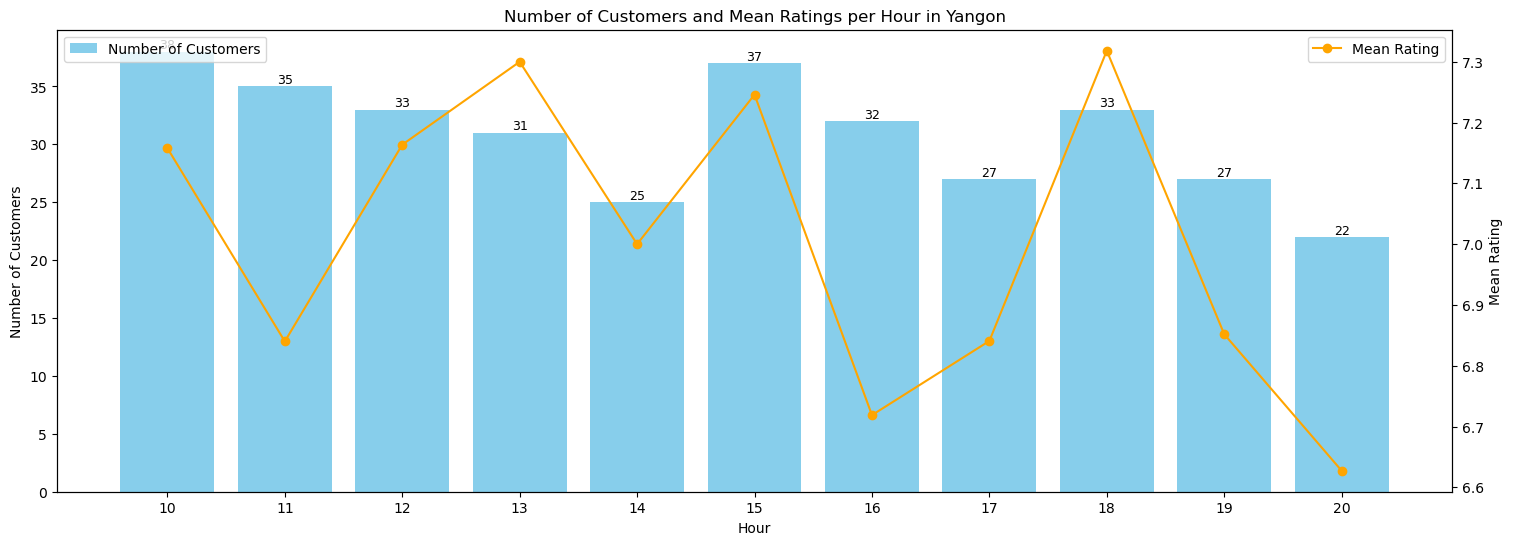

In [8]:
plot_chart(data,"Yangon")

**Comment:**   
- From 10:00 to 12:00, the store was busy, peaking at 10:00 with a total of 38 customers.  
- The store had the fewest customers at 20:00, with a total of 22.
- The store received the highest ratings at 18:00 and the lowest at 20:00.
- The store's ratings were relatively low during the evening.
- The store needs to enhance its services in the evenings.

#### Naypyitaw
Filter DataFrame, group by `Hour` and calculate number of transaction and mean rating.

In [9]:
# Get DataFrame for Napyitaw
mask_naypyitaw = df["City"] == "Naypyitaw"
naypyitaw_df = df[mask_naypyitaw]
# Create DataFrame include number of customer and mean rating for each hour
data = naypyitaw_df.groupby('Hour').agg({'Rating': ['size', 'mean']})
data.columns = ['Count', 'Mean Rating']
data

,Count,Mean Rating
Hour,,
10,37,7.164865
11,22,6.654545
12,31,7.367742
13,34,7.135294
14,28,7.039286
15,33,6.736364
16,28,7.139286
17,27,7.185185
18,25,7.312000


Visualize and comment on the chart.

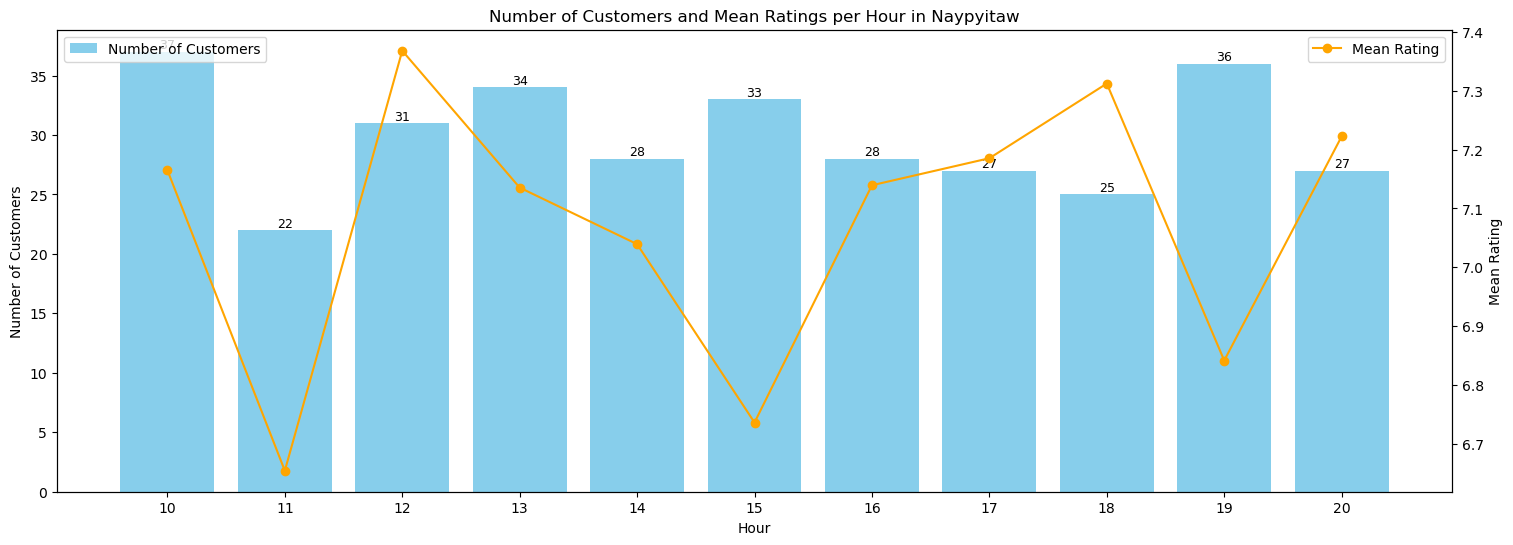

In [10]:
plot_chart(data,"Naypyitaw")

**Comment:**
- The number of customers was fairly consistent across the hours, peaking at 10:00 with 37 customers.  
- The store had the fewest customers at 11:00, with a total of 22.
- The store received the highest ratings at 12:00 and the lowest at 11:00.
- The store had relatively low ratings between 13:00 and 15:00.
- At 15:00, the store was quite crowded, but the relatively low ratings suggest a necessity for reconsidering the staff scheduling.

#### Mandalay  
Filter DataFrame, group by `Hour` and calculate number of transaction and mean rating.

In [11]:
# Get DataFrame for Mandalay
mask_mandalay = df["City"] == "Mandalay"
mandalay_df = df[mask_mandalay]
# Create DataFrame include number of customer and mean rating for each hour
data = mandalay_df.groupby('Hour').agg({'Rating': ['size', 'mean']})
data.columns = ['Count', 'Mean Rating']
data

,Count,Mean Rating
Hour,,
10,26,6.915385
11,33,6.872727
12,25,7.396000
13,38,6.715789
14,30,6.783333
15,32,6.593750
16,17,6.664706
17,20,6.740000
18,35,6.974286


Visualize and comment on the chart.

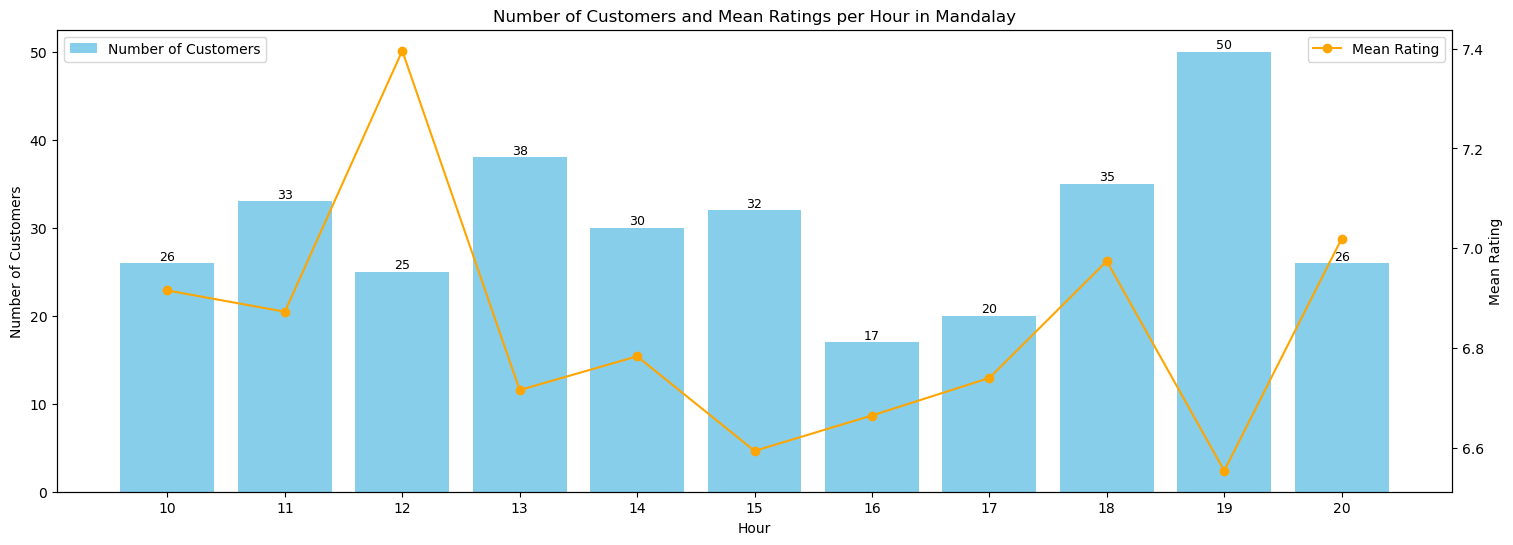

In [12]:
plot_chart(data,"Mandalay")

**Comment:**  
- From 18:00 to 20:00, the store was busy, peaking at 19:00 with a total of 50 customers. 
- The store had the fewest customers at 16:00, with a total of 17.
- The store received the highest ratings at 12:00 and the lowest at 19:00.
- The store had relatively low ratings.
- At 19:00, despite the store having the highest number of customers, it also corresponds with the lowest ratings, indicating a necessity to reevaluate the store's services.

### 3.3 Conclusion

- The service quality at the stores in Yangon and Naypyitaw is relatively good, but improvements are needed, particularly during the evenings.
- The store's ratings in Mandalay are quite low, indicating a need for significant improvement.
- It is necessary to adjust the schedule for employees for better optimization, and stores need to improve their services further as the current ratings are relatively low.

## 4. Question 2: What is the distribution of revenue generated by each product line in each city, and how does this distribution differ among cities?
**Answering this question will**:  
- Enable businesses to align their inventory and marketing strategies more effectively by recognizing which product lines generate the highest revenue in specific cities.
- Help businesses decide where to allocate increased resources for inventory, promotions, or staff training, considering the specific demands of product lines in each city.

**How we answer this question**: 
- Filter DataFrame for each location.
- For each DataFrame, group by `Product line` and sum total revenue.
- Visualize and comment on the chart.


### 4.1 Analyzing to get the answer

Get all store locations.

In [13]:
locations = list(df["City"].unique())
locations

['Yangon', 'Naypyitaw', 'Mandalay']

#### Yangon  
Filter DataFrame, group by `Product line` and sum total revenue.

In [14]:
# Get DataFrame for Yangon
mask_yangon = df["City"] == "Yangon"
yangon_df = df[mask_yangon]
# Create DataFrame include 'Product line' and sum total revenue
data = yangon_df[["Product line","Total"]].groupby("Product line").sum().sort_values(by="Total")
data

,Total
Product line,
Health and beauty,12597.7530
Fashion accessories,16332.5085
Food and beverages,17163.1005
Electronic accessories,18317.1135
Sports and travel,19372.6995
Home and lifestyle,22417.1955


Create `plot_pie_chart` function to visualize.

In [15]:
def plot_pie_chart(data: pd.DataFrame, location : str):
    # Create figure with figsize
    plt.figure(figsize=(6, 6))
    # Plot pie chart
    plt.pie(data["Total"], labels=data.index, autopct='%1.1f%%', startangle=90,normalize=True)
    # Add title and legend
    plt.title(f"Distribution of Product line in {location}")
    plt.legend(bbox_to_anchor=(1.7, 1.0))
    

Visualize and comment on the chart.

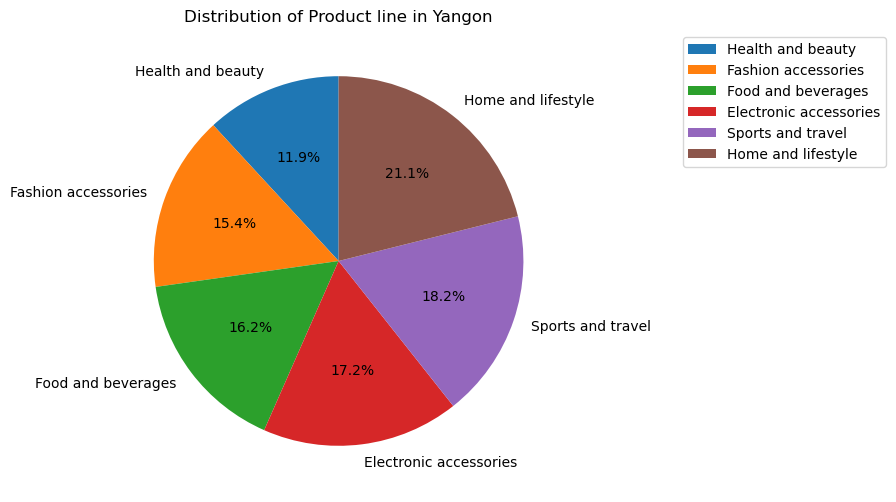

In [16]:
plot_pie_chart(data,"Yangon")

**Comment:**  
- `Home and lifestyle` product line generated the most revenue.
- `Health and beauty` product line generated the least revenue.
- The remaining product lines have nearly equal proportions of revenue.
- To optimize the store's revenue, the store should increase the range of products related to `Home and lifestyle`.

#### Naypyitaw
Filter DataFrame, group by `Product line` and sum total revenue.

In [17]:
# Get DataFrame for Napyitaw
mask_naypyitaw = df["City"] == "Naypyitaw"
naypyitaw_df = df[mask_naypyitaw]
# Create DataFrame include 'Product line' and sum total revenue
data = naypyitaw_df[["Product line","Total"]].groupby("Product line").sum().sort_values(by="Total")
data

,Total
Product line,
Home and lifestyle,13895.5530
Sports and travel,15761.9280
Health and beauty,16615.3260
Electronic accessories,18968.9745
Fashion accessories,21560.0700
Food and beverages,23766.8550


Visualize and comment on the chart.

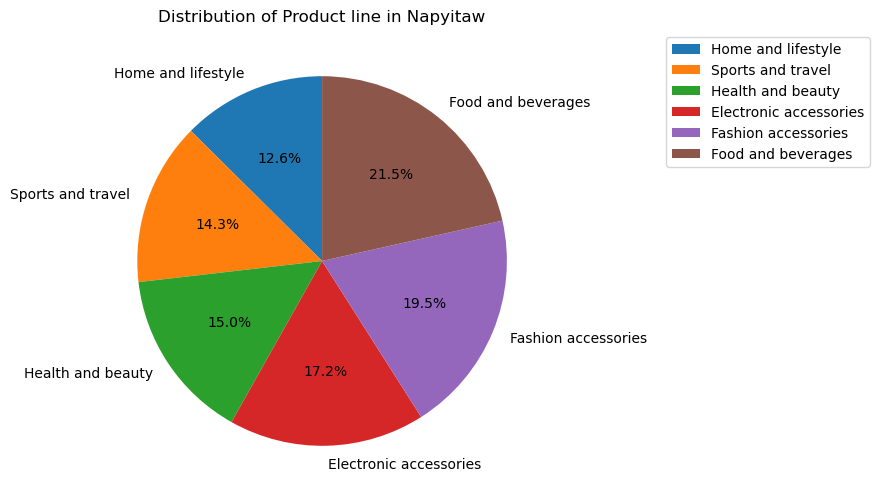

In [18]:
plot_pie_chart(data,"Napyitaw")

**Comment:**  
- `Food and beverages` product line generated the most revenue.
- `Home and lifestyle` product line generated the least revenue.
- To optimize the store's revenue, the store should increase the range of products related to `Food and beverages`.

#### Mandalay  
Filter DataFrame, group by `Product line` and sum total revenue.

In [19]:
# Get DataFrame for Mandalay
mask_mandalay = df["City"] == "Mandalay"
mandalay_df = df[mask_mandalay]
# Create DataFrame include 'Product line' and sum total revenue
data = mandalay_df[["Product line","Total"]].groupby("Product line").sum().sort_values(by="Total")
data

,Total
Product line,
Food and beverages,15214.8885
Fashion accessories,16413.3165
Electronic accessories,17051.4435
Home and lifestyle,17549.1645
Health and beauty,19980.6600
Sports and travel,19988.1990


Visualize and comment on the chart.

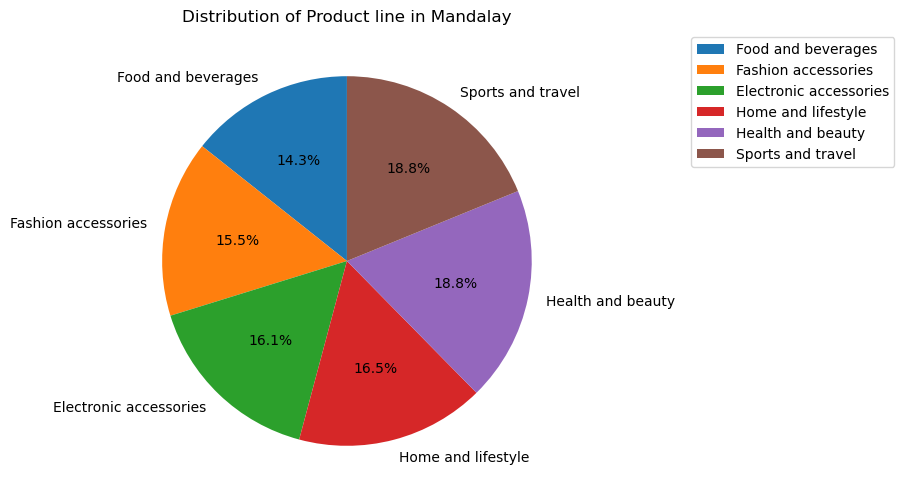

In [20]:
plot_pie_chart(data,"Mandalay")

**Comment:**  
- All product lines have nearly equal proportions of revenue.
- The least revenue generated by `Food and Beverages` product line.
- `Sport and travel`,`Health and beauty` and `Home and lifestyle` are the top three revenue generators. This indicates that customers in this city prioritize health and well-being.

### 4.2 Conclusion  
The distribution of revenue for each product line differs across the three cities.  
- `Food and beverages` generate the most revenue in `Napyitaw` whereas it is the least revenue generator in `Mandalay`.
- In `Mandalay` the top three revenue generators are `Sport and travel`,`Health and beauty` and `Home and lifestyle`. However, in `Napyitaw` these same three product lines are the lowest revenue generators.